# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# pip install citipy

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# API Key 
from api_keys import weather_api_key

# Importing the Citipy for Latitude and longitude
from citipy import citipy

# Output file 
Output_Data_File = "../Output_Data_File/cities.csv"

# Defining the Latitude and Longitude 
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creating a set of various Latitude and Longitude combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lat_lngs = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Empty Lists
x=1
count=1
city_df=[]
lat=[] 
long=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]


#Base line information
url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
city_responses= [ ]

#Beggining Print
print("Beginning Data Retrieval")
print("------------------------")

#for loop to make a api request for each city. 
for city in cities:
    if x >= 51: 
        count+= 1
        x=1
    try:
        city_data=requests.get(url + city).json()
        city_df.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        Max_Temp.append(city_data['main']['temp_max'])
        Humidity.append(city_data['main']["humidity"])
        Cloudiness.append(city_data["clouds"]['all'])
        Wind_Speed.append(city_data["wind"]['speed'])
        Country.append(city_data['sys']['country'])
        Date.append(city_data['dt'])
        city_responses.append(city_data)
        print(f"Processing Record {x} of set {count}|{city}")
        x+=1
    except: 
        print("City not found. Skipping... ")
        
#Final Print
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval
------------------------
City not found. Skipping... 
Processing Record 1 of set 1|hambantota
Processing Record 2 of set 1|codrington
Processing Record 3 of set 1|ushuaia
City not found. Skipping... 
Processing Record 4 of set 1|cabedelo
Processing Record 5 of set 1|yar-sale
Processing Record 6 of set 1|maceio
Processing Record 7 of set 1|kohlu
Processing Record 8 of set 1|vila velha
Processing Record 9 of set 1|sept-iles
Processing Record 10 of set 1|cayenne
Processing Record 11 of set 1|bredasdorp
Processing Record 12 of set 1|ribeira grande
Processing Record 13 of set 1|raahe
Processing Record 14 of set 1|xai-xai
Processing Record 15 of set 1|notodden
Processing Record 16 of set 1|formosa
Processing Record 17 of set 1|port alfred
Processing Record 18 of set 1|saint leonard
Processing Record 19 of set 1|kisangani
Processing Record 20 of set 1|aksum
Processing Record 21 of set 1|cape town
Processing Record 22 of set 1|qusar
Processing Record 23 of set 1|ostrov

Processing Record 49 of set 4|berlevag
Processing Record 50 of set 4|mahajanga
Processing Record 1 of set 5|adrar
Processing Record 2 of set 5|san carlos de bariloche
Processing Record 3 of set 5|toluviejo
Processing Record 4 of set 5|kayerkan
Processing Record 5 of set 5|sovetskiy
City not found. Skipping... 
Processing Record 6 of set 5|kamakwie
Processing Record 7 of set 5|skibbereen
Processing Record 8 of set 5|abu dhabi
Processing Record 9 of set 5|cadca
Processing Record 10 of set 5|mocuba
Processing Record 11 of set 5|santo antonio do ica
Processing Record 12 of set 5|birjand
City not found. Skipping... 
Processing Record 13 of set 5|jawhar
Processing Record 14 of set 5|meulaboh
Processing Record 15 of set 5|wana
Processing Record 16 of set 5|santarem
Processing Record 17 of set 5|kontagora
Processing Record 18 of set 5|kinango
Processing Record 19 of set 5|grand gaube
Processing Record 20 of set 5|vallenar
Processing Record 21 of set 5|kemijarvi
Processing Record 22 of set 5|ts

Processing Record 47 of set 8|richards bay
Processing Record 48 of set 8|estreito
Processing Record 49 of set 8|kutum
Processing Record 50 of set 8|qasigiannguit
Processing Record 1 of set 9|muros
Processing Record 2 of set 9|pabbi
Processing Record 3 of set 9|san andres
Processing Record 4 of set 9|lyubech
Processing Record 5 of set 9|iquique
Processing Record 6 of set 9|uppsala
Processing Record 7 of set 9|barsi
Processing Record 8 of set 9|abu samrah
Processing Record 9 of set 9|saquarema
Processing Record 10 of set 9|stornoway
Processing Record 11 of set 9|amapa
Processing Record 12 of set 9|omboue
Processing Record 13 of set 9|bauchi
Processing Record 14 of set 9|hauzenberg
Processing Record 15 of set 9|arlit
Processing Record 16 of set 9|chicama
Processing Record 17 of set 9|el dorado
Processing Record 18 of set 9|beyneu
Processing Record 19 of set 9|sao francisco de assis
City not found. Skipping... 
Processing Record 20 of set 9|lodwar
Processing Record 21 of set 9|liverpool
Pr

In [ ]:
# #Base line information
# url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q="
# city_responses= [ ]

# #Beggining Print
# print("Beginning Data Retrieval")
# print("------------------------")
# print(url)

# for loop to make a api request for each city. 
# for city in cities:
#     print(city)
#     if index_counter >= 49: 
#         index_counter = 0
#         set_counter = set_counter + 1
        
#     try:
#         city_data=requests.get(url + city).json()
#         print(requests.status)
#         city_df.append(city_data['name'])
#         lat.append(city_data['coord']['lat'])
#         long.append(city_data['coord']['lon'])
#         Max_Temp.append(city_data['main']['temp_max'])
#         Humidity.append(city_data['main']["humidity"])
#         Cloudiness.append(city_data["clouds"]['all'])
#         Wind_Speed.append(city_data["wind"]['speed'])
#         Country.append(city_data['sys']['country'])
#         Date.append(city_data['dt'])
#         city_responses.append(city_data)
#         print(f"Processing Record {x} of set {count}|{city}")
#         x+=1
#     except: 
#         print("City not found. Skipping... ")
        
# #Final Print
# print("------------------------")
# print("Data Retrieval Complete ")
# print("------------------------")



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df=pd.DataFrame({"City": city_df, "Lat": lat, "Lng": long, 
                      "Max Temp": Max_Temp, "Humidity": Humidity, 
                      "Cloudiness":Cloudiness, "Wind Speed": Wind_Speed,
                     "Country": Country, "Date": Date})

weather_df.head(5)

# Creating a DataFrame from dictionary
weather_data = pd.DataFrame(weather_df)

# Display count of weather data values 
weather_data.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [13]:
# Saving the DataFrame to .csv File 
weather_df.to_csv("Output_Data_File/cities.csv", index = False)

In [14]:
# Describing the Weather Data 
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.291720,2.570195,59.064433,76.315603,51.753546,7.184220,1.603332e+09
std,32.119283,54.742908,17.860818,20.572094,39.476835,5.107117,2.011840e+02
min,-54.800000,-121.660000,12.200000,10.000000,0.000000,0.110000,1.603331e+09
25%,-6.307500,-52.322500,46.972500,67.750000,5.000000,3.360000,1.603332e+09
50%,22.485000,14.020000,62.610000,82.000000,56.000000,5.820000,1.603332e+09
75%,48.437500,42.890000,73.695000,93.000000,90.000000,9.757500,1.603332e+09
max,78.220000,141.970000,89.600000,100.000000,100.000000,28.860000,1.603332e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#There is no data where humidity is over 100%
weather_df["Humidity"].max()

#This is how I would create the dataframe though

weather_df = weather_df[weather_df["Humidity"]<= 100]

weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.291720,2.570195,59.064433,76.315603,51.753546,7.184220,1.603332e+09
std,32.119283,54.742908,17.860818,20.572094,39.476835,5.107117,2.011840e+02
min,-54.800000,-121.660000,12.200000,10.000000,0.000000,0.110000,1.603331e+09
25%,-6.307500,-52.322500,46.972500,67.750000,5.000000,3.360000,1.603332e+09
50%,22.485000,14.020000,62.610000,82.000000,56.000000,5.820000,1.603332e+09
75%,48.437500,42.890000,73.695000,93.000000,90.000000,9.757500,1.603332e+09
max,78.220000,141.970000,89.600000,100.000000,100.000000,28.860000,1.603332e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_df[weather_df['Humidity']>100].index
indices

Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df = weather_data.drop(indices, inplace=False)
clean_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.12,81.12,77.00,100,40,4.70,LK,1603331810
1,Codrington,-38.27,141.97,61.21,68,65,6.76,AU,1603331559
2,Ushuaia,-54.80,-68.30,50.00,53,75,10.29,AR,1603331810
3,Cabedelo,-6.98,-34.83,77.00,94,75,5.82,BR,1603331810
4,Yar-Sale,66.83,70.83,19.33,97,91,12.86,RU,1603331811


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

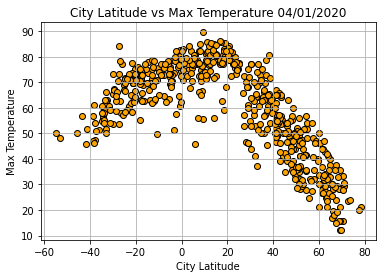

In [20]:
latitude=weather_df["Lat"]
Max_Temp=weather_df["Max Temp"]

#Making Scatter Plot
plt.scatter(latitude, Max_Temp, marker="o", facecolors="orange", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Max Temperature 04/01/2020")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.savefig("../output_data/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

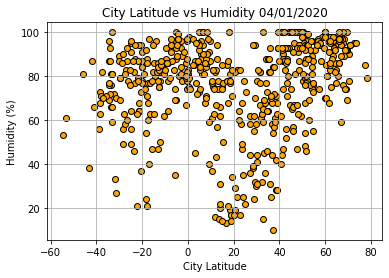

In [21]:
# Y = Humidity
Humidity_data=weather_df["Humidity"]

#Making Scatter Plot
plt.scatter(latitude, Humidity_data, marker="o", facecolors="orange", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Humidity 04/01/2020")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

#Saving the graph to a PNG
plt.savefig("Output_Data_File/LatitudevsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

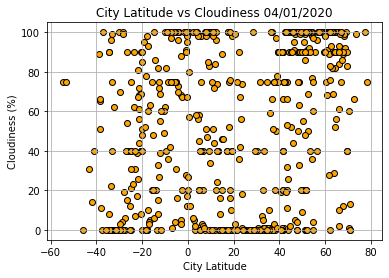

In [22]:
# Y = Cloudiness 
Cloud_Data=weather_df["Cloudiness"]

#Making Scatter Plot
plt.scatter(latitude, Cloud_Data, marker="o", facecolors="orange", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Cloudiness 04/01/2020")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

#Saving the graph to a PNG
plt.savefig("Output_Data_File/LatitudevsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

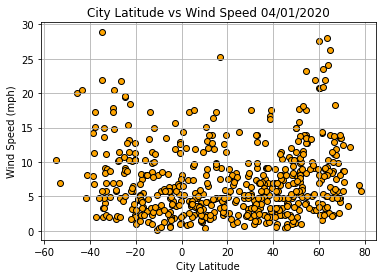

In [23]:
# Y = Wind Speed 
Wind_Speed_Data=weather_df["Wind Speed"]

#Making Scatter Plot
plt.scatter(latitude, Wind_Speed_Data, marker="o", facecolors="orange", edgecolors="black")

#Formatting
plt.grid()
plt.title("City Latitude vs Wind Speed 04/01/2020")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Output_Data_File/LatitudevsWindSpeed.png")
plt.show()

## Linear Regression

In [24]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df=weather_df[weather_df["Lat"]>0]
Southern_df=weather_df[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

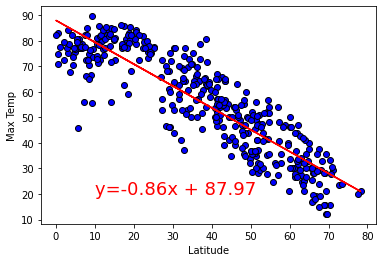

The r-squared is: 0.7834843642328165


In [25]:
def plot_linear_regression(x,y,title,text_coordinates):
    (slope, intercept,rvalue, pvalue, stderr)= linregress(x,y)
    regress_values= x*slope + intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, text_coordinates, color='red', fontsize= 18)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")
    
plot_linear_regression(Northern_df["Lat"], Northern_df["Max Temp"], "Max Temp",(10,20))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

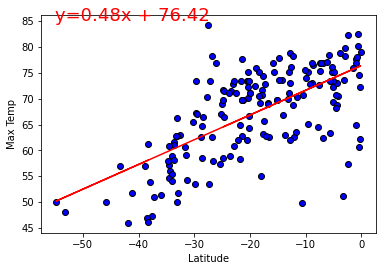

The r-squared is: 0.431807431256399


In [26]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Max Temp"], "Max Temp",(-55,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

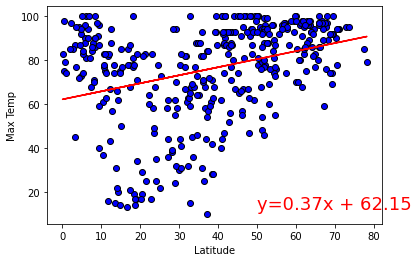

The r-squared is: 0.11162595025146428


In [27]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Humidity"], "Max Temp",(50,12))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

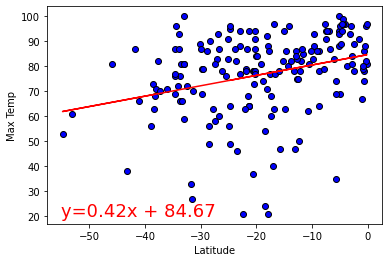

The r-squared is: 0.09239329407267166


In [28]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Humidity"], "Max Temp",(-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

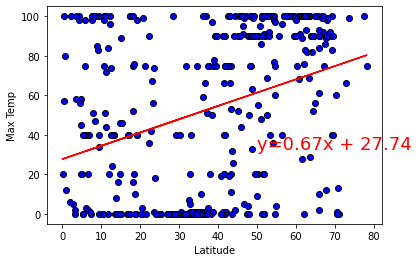

The r-squared is: 0.11199303849383868


In [29]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Cloudiness"], "Max Temp",(50,33))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

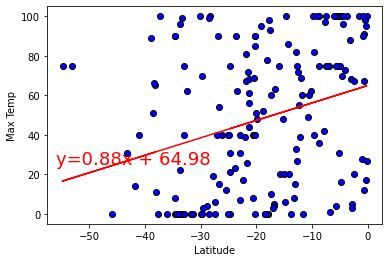

The r-squared is: 0.08509281049674626


In [30]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Cloudiness"], "Max Temp",(-56,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

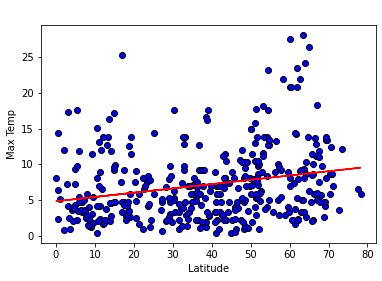

The r-squared is: 0.05800120058227868


In [31]:
plot_linear_regression(Northern_df["Lat"], Northern_df["Wind Speed"], "Max Temp",(5,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

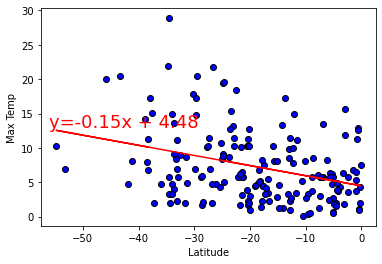

The r-squared is: 0.11367477050874365


In [32]:
plot_linear_regression(Southern_df["Lat"], Southern_df["Wind Speed"], "Max Temp",(-56,13))